In [1]:
import numpy
import scipy
import pandas
import matplotlib.pyplot as plt
import sklearn

This week, we have a dataset containing samples of mushrooms:

In [2]:
df = pandas.read_csv('mushrooms.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Class indicates whether that mushroom is edible or poisonous, the other attributes include:

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

Let's visualize attributes 'odor' and 'stalk-root':

Text(0.5, 1.0, 'Edibility of a mushrooms vs. their odor and stalk root')

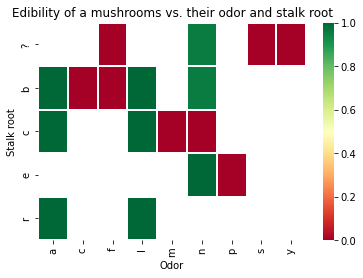

In [3]:
import seaborn

df['is_edible'] = (df['class'] == 'e') * 1  # create another column indicating in binary
df_hm = df[['is_edible', 'odor', 'stalk-root']].groupby(['odor', 'stalk-root']).mean().unstack(level=0)

fig, ax = plt.subplots()
seaborn.heatmap(df_hm, cmap='RdYlGn', linewidth=0.4)

x_axis_labels = [elem[1] for elem in df_hm.columns]
# y_axis_labels = list(df_hm.index)
plt.xticks(numpy.arange(9)+0.5, labels=x_axis_labels)
plt.xlabel('Odor')
plt.ylabel('Stalk root')
plt.title('Edibility of a mushrooms vs. their odor and stalk root')

It seems like these two attributes could be good candidates to predict the edibility of a mushroom.
Creating a decision tree:

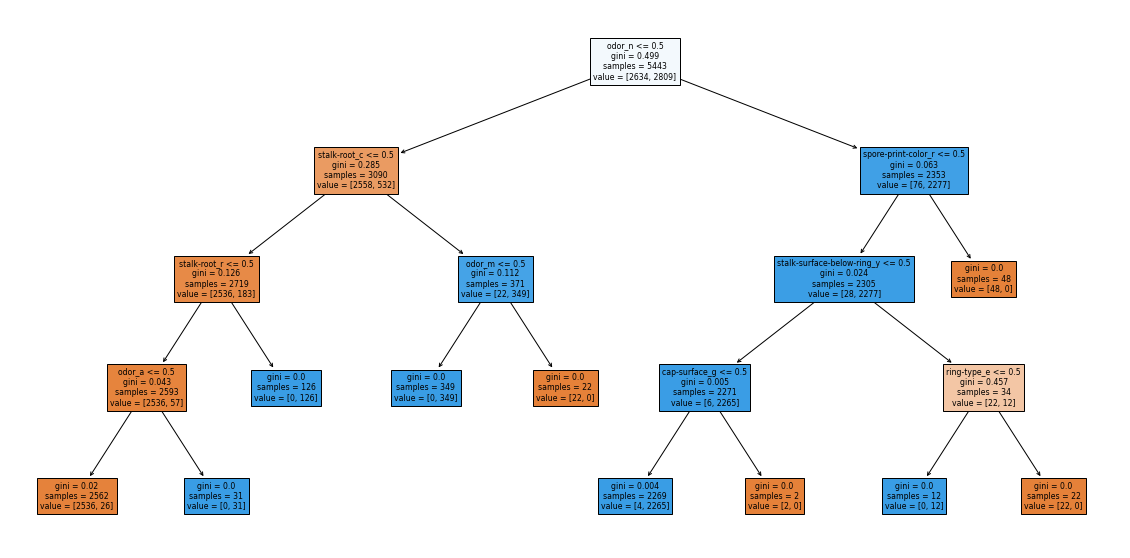

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

X = pandas.get_dummies(df.drop(columns=['class', 'is_edible']))
y = df['is_edible']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=433)

clf = DecisionTreeClassifier(max_depth=4, random_state=43306)
clf.fit(X_train, y_train)

# visualizing decision tree
plt.figure(figsize=(20, 10))
result = tree.plot_tree(clf, feature_names=X.columns, filled=True)

Fill colors indicate the amount of samples in the node.

Checking the accuracy of the model in train and test to see if it overfits:

In [5]:
from sklearn.metrics import accuracy_score

train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

print(f'Train accuracy: {accuracy_score(y_train, train_predictions): .2f}\t '
      f'Train accuracy: {accuracy_score(y_test, test_predictions): .2f}')

Train accuracy:  0.99	 Train accuracy:  0.99


As another measure, we can take a look at the confusion matrix:

Text(33.0, 0.5, 'Actual')

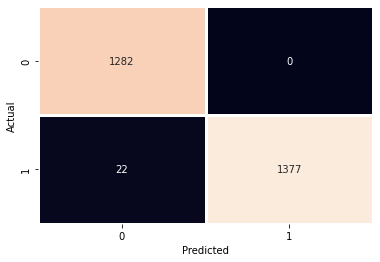

In [6]:
from sklearn.metrics import confusion_matrix

# fig, ax = plt.subplots()
seaborn.heatmap(
    confusion_matrix(y_test, test_predictions), linewidth=3, annot=True, fmt='.0f',
    cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')

We see that the decision model incurs a few false negatives in the test dataset,
so it misclassified some edible ones as poisonous,
which is completely fine as long as we don't classify poisonous ones as edible.